In [2]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from autoencoderhandler import *

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")
%load_ext autoreload
%autoreload 2

Using device: cuda


(-0.5, 255.5, 255.5, -0.5)

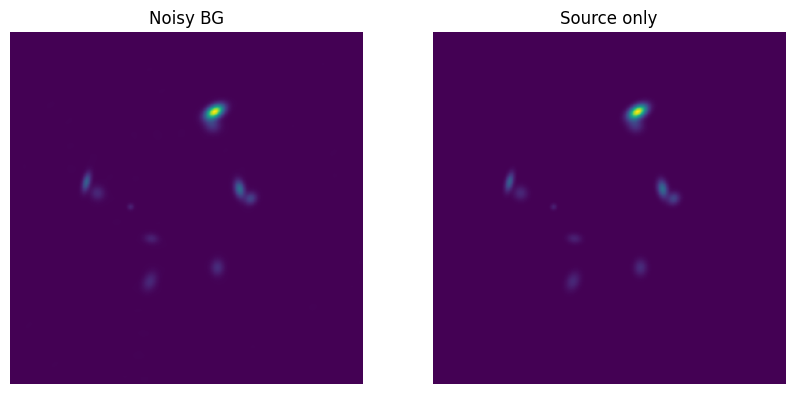

In [3]:

image, image_forground = create_image()

# Display the image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image.cpu().numpy())
plt.title('Noisy BG')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(image_forground.cpu().numpy())
plt.title('Source only')
plt.axis('off')


In [4]:

# Dataset and DataLoader setup
num_train_images = 2048  # Specify how many images you want for training
train_dataset = DynamicImageDataset(num_train_images)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=False)

In [5]:

# Model, loss, and optimizer
model = Autoencoder2().to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=2e-3)

# Train the model
train(model, train_loader, epochs=100, device=device, criterion=criterion, optimizer=optimizer)

torch.save(model.state_dict(), 'model.pth')

Epoch 1, Loss: 0.12578500481322408
Epoch 2, Loss: 0.06145161285530776
Epoch 3, Loss: 0.03323518484830856
Epoch 4, Loss: 0.0203702769940719
Epoch 5, Loss: 0.014053819788387045
Epoch 6, Loss: 0.010529466875595972
Epoch 7, Loss: 0.008494468056596816
Epoch 8, Loss: 0.0068684065190609545
Epoch 9, Loss: 0.0056487974361516535
Epoch 10, Loss: 0.004754253677674569
Epoch 11, Loss: 0.004149489977862686
Epoch 12, Loss: 0.0037416886334540322
Epoch 13, Loss: 0.003442194574745372
Epoch 14, Loss: 0.0031928274474921636
Epoch 15, Loss: 0.0030076111215748824
Epoch 16, Loss: 0.0028878095690743066
Epoch 17, Loss: 0.002770340273855254
Epoch 18, Loss: 0.0026386390018160455
Epoch 19, Loss: 0.0025565940668457188
Epoch 20, Loss: 0.0024334326953976415
Epoch 21, Loss: 0.0024133418119163252
Epoch 22, Loss: 0.0023426573097822256
Epoch 23, Loss: 0.002311524483957328
Epoch 24, Loss: 0.0022514095217047725
Epoch 25, Loss: 0.002200958493631333
Epoch 26, Loss: 0.0021845589217264205
Epoch 27, Loss: 0.0021368874513427727
E

In [6]:
# save the model
image_test = torch.Tensor(image_forground).to(device)
image_test = image_test.unsqueeze(0)


(model.encoder(image_test[None,:,:])).shape

torch.Size([1, 512])

In [7]:
image_test.shape

torch.Size([1, 256, 256])

(-0.5, 255.5, 255.5, -0.5)

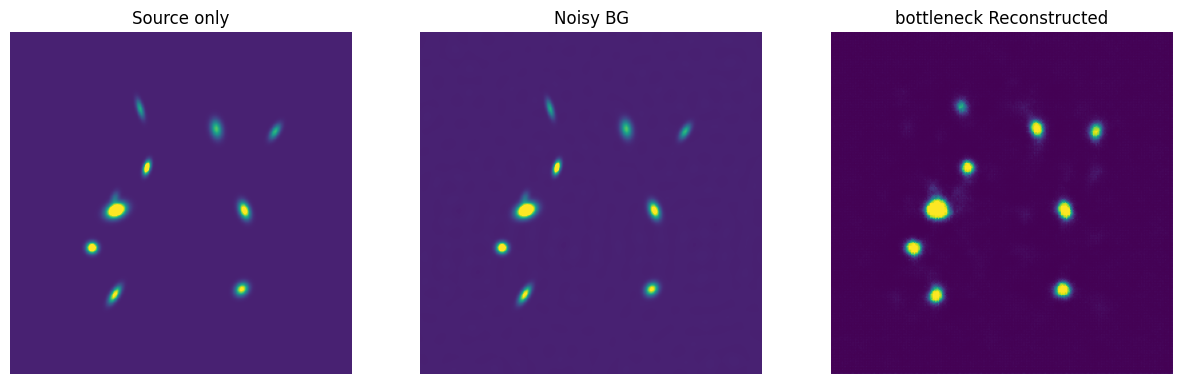

In [8]:
model.eval()


image_test, image_forground_test = train_dataset.__getitem__(0)

with torch.no_grad():
    image_test = image_test.to(device)
    output = model(image_test.unsqueeze(0))
    output = output.squeeze().cpu().numpy()

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 2)
plt.imshow(image_test.squeeze(0).cpu().numpy(),vmax=1,vmin=-0.1)
plt.title('Noisy BG')
plt.axis('off')


plt.subplot(1, 3, 1)
plt.imshow(image_forground_test.squeeze(0).cpu().numpy(),vmax=1,vmin=-0.1)
plt.title('Source only')
plt.axis('off')



plt.subplot(1, 3, 3)
plt.imshow(output)
plt.title('bottleneck Reconstructed')
plt.axis('off')

In [9]:
from astropy.io import fits

fname_dirty = 'sun_only-t0002-dirty.fits'
hdul = fits.open(fname_dirty)
data_dirty = hdul[0].data.squeeze()
header = hdul[0].header

data_for_train = torch.Tensor(data_dirty[None,None,:,:]/np.max(data_dirty)).to(device)

In [10]:
data_for_train

tensor([[[[ 0.0013,  0.0144,  0.0262,  ..., -0.0142, -0.0172, -0.0309],
          [-0.0177, -0.0113, -0.0003,  ..., -0.0204, -0.0226, -0.0349],
          [-0.0243, -0.0266, -0.0205,  ..., -0.0214, -0.0247, -0.0348],
          ...,
          [-0.1001, -0.1018, -0.0913,  ...,  0.0256,  0.0254,  0.0196],
          [-0.0797, -0.0794, -0.0683,  ...,  0.0189,  0.0181,  0.0099],
          [-0.0437, -0.0329, -0.0169,  ...,  0.0079,  0.0024, -0.0097]]]],
       device='cuda:0')

In [32]:

model = Autoencoder3().to(device)
model.load_state_dict(torch.load('model200round128model3.pth'))
model.eval()
with torch.no_grad():
    output = model.decoder(model.encoder(data_for_train))
    output = output.squeeze().cpu().numpy()

In [34]:

model = Autoencoder3().to(device)
model.load_state_dict(torch.load('model400round128model3.pth'))
model.eval()
with torch.no_grad():
    output = model.decoder(model.encoder(data_for_train))
    output = output.squeeze().cpu().numpy()

In [38]:

model = Autoencoder2().to(device)
model.load_state_dict(torch.load('model.pth'))
model.eval()
with torch.no_grad():
    output = model.decoder(model.encoder(data_for_train/3))
    output = output.squeeze().cpu().numpy()

TypeError: super(type, obj): obj must be an instance or subtype of type

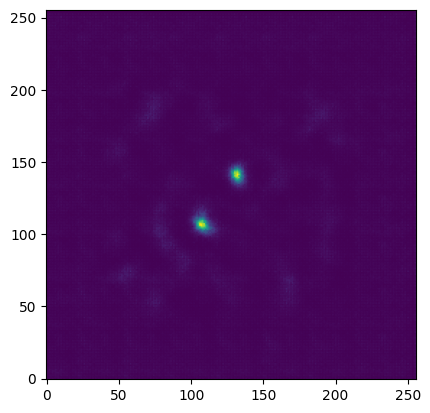

In [37]:
plt.imshow(output, origin='lower')

In [131]:
np.max(output)

0.49765688

In [122]:
output

array([[0.16543151, 0.02186841, 0.02312079, ..., 0.01100943, 0.04321918,
        0.08734369],
       [0.02892669, 0.00398104, 0.00394483, ..., 0.00599234, 0.00409301,
        0.01419869],
       [0.0220685 , 0.00123559, 0.00849683, ..., 0.00059095, 0.00463646,
        0.00850629],
       ...,
       [0.01988514, 0.00311575, 0.0057327 , ..., 0.00170902, 0.00495734,
        0.01265731],
       [0.02601946, 0.00076575, 0.01724237, ..., 0.00043746, 0.00613711,
        0.00847648],
       [0.12774888, 0.02058375, 0.01755235, ..., 0.02566673, 0.01218849,
        0.173009  ]], dtype=float32)